Midterm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file from online github 
df2 = 'https://raw.githubusercontent.com/leningschulich/schulich_data_science/main/midterm_data.csv'
df = pd.read_csv(df2)
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [3]:
df.info() # understanding our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [6]:
df.describe(include = 'all')


,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


we can see there are 3 types of devices and 5 unique locations. The location that people visit the website most often is location4, which includes 1056 people. Desktop is the most often used device in this dataset. 2538 people are using it. 

Data cleaning and preparation:

Based on the information provided above, we can find that device has missing values of 100, and location has 30 missing values. 

In [7]:
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


There is one row that both device and location data are missing, thus we delete this row.

In [8]:
df.drop([2130], axis=0, inplace=True)

Then, we drop rows with location is null, since 29 rows only accounts for 5% of entire data.

In [11]:
df.drop(df[df['location'].isnull()].index,axis =0,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4970 non-null   int64  
 1   age              4970 non-null   int64  
 2   sessions         4970 non-null   int64  
 3   time_spent       4970 non-null   float64
 4   pages_visited    4970 non-null   int64  
 5   cart_items       4970 non-null   int64  
 6   cart_value       4970 non-null   float64
 7   checkout_status  4970 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 427.1+ KB


We can see that device still have about 100 missing values.

Since desktop is the most common device, we now try to fill in the null value with desktop, and others, respectively to see if there is any changes.

In [13]:
df_test = df.copy()
df_test.groupby('device').describe()

userID                                                           \
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2522.0  2484.090801  1436.080284  1.0  1261.25  2499.5  3736.75   
Mobile   1417.0  2516.292167  1457.973685  7.0  1236.00  2508.0  3807.00   
Tablet    932.0  2535.273605  1453.698885  5.0  1265.25  2516.5  3757.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2522.0  41.308882  ...   197.2450  427.40          2522.0   
Mobile   4991.0  1417.0  41.706422  ...   201.7600  387.98          1417.0   
Tablet   5000.0   932.0  41.875536  ...   197.8775  377.98           932.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285488  0.451736  0.0  0.0  0.0  1.0  1.0  
Mobile   0.263938  0.440922  0.0  0.0  0.0  1.0  1.0  
Tablet   0.255365  0.436300  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [16]:
df_test['device'] = df_test['device'].fillna('Other')
df_test.groupby('device').describe()

userID                                                            \
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2522.0  2484.090801  1436.080284   1.0  1261.25  2499.5  3736.75   
Mobile   1417.0  2516.292167  1457.973685   7.0  1236.00  2508.0  3807.00   
Other      99.0  2411.656566  1386.399927  80.0  1226.00  2379.0  3541.50   
Tablet    932.0  2535.273605  1453.698885   5.0  1265.25  2516.5  3757.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2522.0  41.308882  ...   197.2450  427.40          2522.0   
Mobile   4991.0  1417.0  41.706422  ...   201.7600  387.98          1417.0   
Other    4988.0    99.0  41.282828  ...   191.7000  302.48            99.0   
Tablet   5000.0   932.0  41.875536  ...   197.8775  377.98           932.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285488  0.451736  0.0  0.0  0.0  1.0  1.0  
Mobile   0.263938  0.440922  0.0  0.0  0.0  1.0  1.0  
Other    0.222222  0.417855  0.0  0.0  0.0  0.0  1.0  
Tablet   0.255365  0.436300  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

In [17]:
df_test_2 = df.copy()
df_test_2['device'] = df_test_2['device'].fillna('Desktop')
df_test_2.groupby('device').describe()

userID                                                           \
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2621.0  2481.354826  1434.045070  1.0  1260.00  2497.0  3723.00   
Mobile   1417.0  2516.292167  1457.973685  7.0  1236.00  2508.0  3807.00   
Tablet    932.0  2535.273605  1453.698885  5.0  1265.25  2516.5  3757.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2621.0  41.307898  ...   196.9500  427.40          2621.0   
Mobile   4991.0  1417.0  41.706422  ...   201.7600  387.98          1417.0   
Tablet   5000.0   932.0  41.875536  ...   197.8775  377.98           932.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.283098  0.450590  0.0  0.0  0.0  1.0  1.0  
Mobile   0.263938  0.440922  0.0  0.0  0.0  1.0  1.0  
Tablet   0.255365  0.436300  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

We can find big changes exist in std column when I use 'Others', and only slightly changes of data when I use 'Desktop'. 
Thus, we can adjust all the null values in device column to fill in the value 'Desktop'

In [18]:
df['device'] = df['device'].fillna('Desktop')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4970 non-null   int64  
 1   age              4970 non-null   int64  
 2   sessions         4970 non-null   int64  
 3   time_spent       4970 non-null   float64
 4   pages_visited    4970 non-null   int64  
 5   cart_items       4970 non-null   int64  
 6   cart_value       4970 non-null   float64
 7   checkout_status  4970 non-null   int64  
 8   device           4970 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 427.1+ KB


Now we don't have any missing values, lets look at the duplicates.

In [20]:
df.drop_duplicates(inplace=True) #We need to drop rows with all values are the same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4970 non-null   int64  
 1   age              4970 non-null   int64  
 2   sessions         4970 non-null   int64  
 3   time_spent       4970 non-null   float64
 4   pages_visited    4970 non-null   int64  
 5   cart_items       4970 non-null   int64  
 6   cart_value       4970 non-null   float64
 7   checkout_status  4970 non-null   int64  
 8   device           4970 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 427.1+ KB


We can find that there is no duplicate in our dataset. Now, let's see if there is outliers in this dataset.

<AxesSubplot:ylabel='cart_value'>

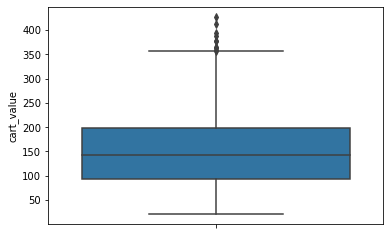

In [29]:
sns.boxplot(data = df, y='cart_value')

<AxesSubplot:xlabel='cart_value', ylabel='Count'>

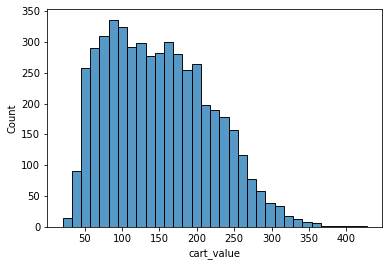

In [30]:
sns.histplot(df['cart_value'])

In [31]:
# check how many carts have value larger than 350 and delete them
df.drop(df[(df['cart_value']>350)].index,axis =0,
        inplace=True)

<AxesSubplot:ylabel='pages_visited'>

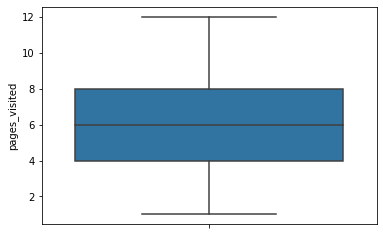

In [33]:
sns.boxplot(data = df, y='pages_visited')

<AxesSubplot:ylabel='cart_items'>

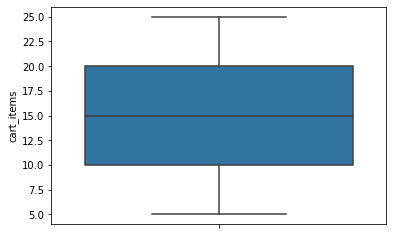

In [34]:
sns.boxplot(data = df, y='cart_items')

<AxesSubplot:ylabel='sessions'>

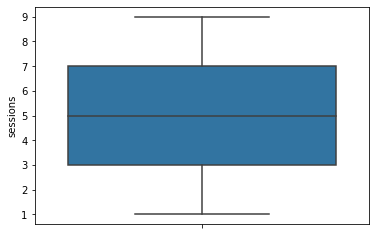

In [35]:
sns.boxplot(data = df, y='sessions')

<AxesSubplot:ylabel='age'>

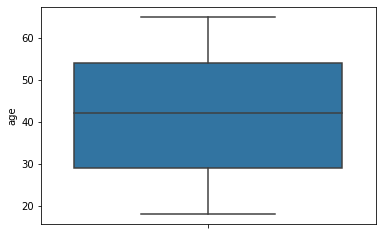

In [36]:
sns.boxplot(data = df, y='age')

Now, we finish the data cleaning.

Then, we can start to analyze the behaviour or characteristics of users who complete check out vs those who do not

In [28]:
df2 = df.groupby('checkout_status')
df2.describe()

age                                                      \
                  count       mean        std   min   25%   50%   75%   max   
checkout_status                                                               
0                3616.0  41.620575  13.974146  18.0  29.0  42.0  54.0  65.0   
1                1354.0  41.280650  14.235932  18.0  28.0  41.0  54.0  65.0   

                sessions            ... cart_items       cart_value  \
                   count      mean  ...        75%   max      count   
checkout_status                     ...                               
0                 3616.0  5.054480  ...       22.0  25.0     3616.0   
1                 1354.0  4.940916  ...       17.0  20.0     1354.0   

                                                                            \
                       mean        std    min       25%      50%       75%   
checkout_status                                                              
0                152.661009  74.949552  20.41   85.5675  147.025  209.6775   
1                140.725886  47.669413  43.22  103.1175  136.180  174.3750   

                         
                    max  
checkout_status          
0                427.40  
1                313.76  

[2 rows x 48 columns]